<a href="https://colab.research.google.com/github/piyushtiwary/car_price_prediction/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Upload your kaggle.json file
from google.colab import files
files.upload()  # Upload your kaggle.json

# Step 2: Setup Kaggle API credentials
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 3: Download the dataset from Kaggle
dataset_slug = "mayankpatel14/second-hand-used-cars-data-set-linear-regression"
!kaggle datasets download -d {dataset_slug}

# Step 4: Unzip the dataset
!unzip -o second-hand-used-cars-data-set-linear-regression.zip


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/mayankpatel14/second-hand-used-cars-data-set-linear-regression
License(s): unknown
  0% 0.00/24.3k [00:00<?, ?B/s]
100% 24.3k/24.3k [00:00<00:00, 84.8MB/s]
Archive:  second-hand-used-cars-data-set-linear-regression.zip
  inflating: train.csv               


In [3]:
!unzip -o second-hand-used-cars-data-set-linear-regression.zip


Archive:  second-hand-used-cars-data-set-linear-regression.zip
  inflating: train.csv               


In [41]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.metrics import RootMeanSquaredError
from matplotlib.pylab import plt


In [5]:
filepath = "/content/train.csv"

In [6]:
data = pd.read_csv(filepath)
data[:10]

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
5,6,650007,844846,6,148846,2,9,13,138,61,109,177933.5
6,7,633344,756063,5,78025,1,9,15,171,94,132,410877.0
7,8,662990,891569,6,76546,1,2,12,146,109,96,467471.5
8,9,543184,841354,7,57662,4,7,14,151,50,132,462397.5
9,10,573043,879481,2,132347,2,3,12,200,115,82,197266.0


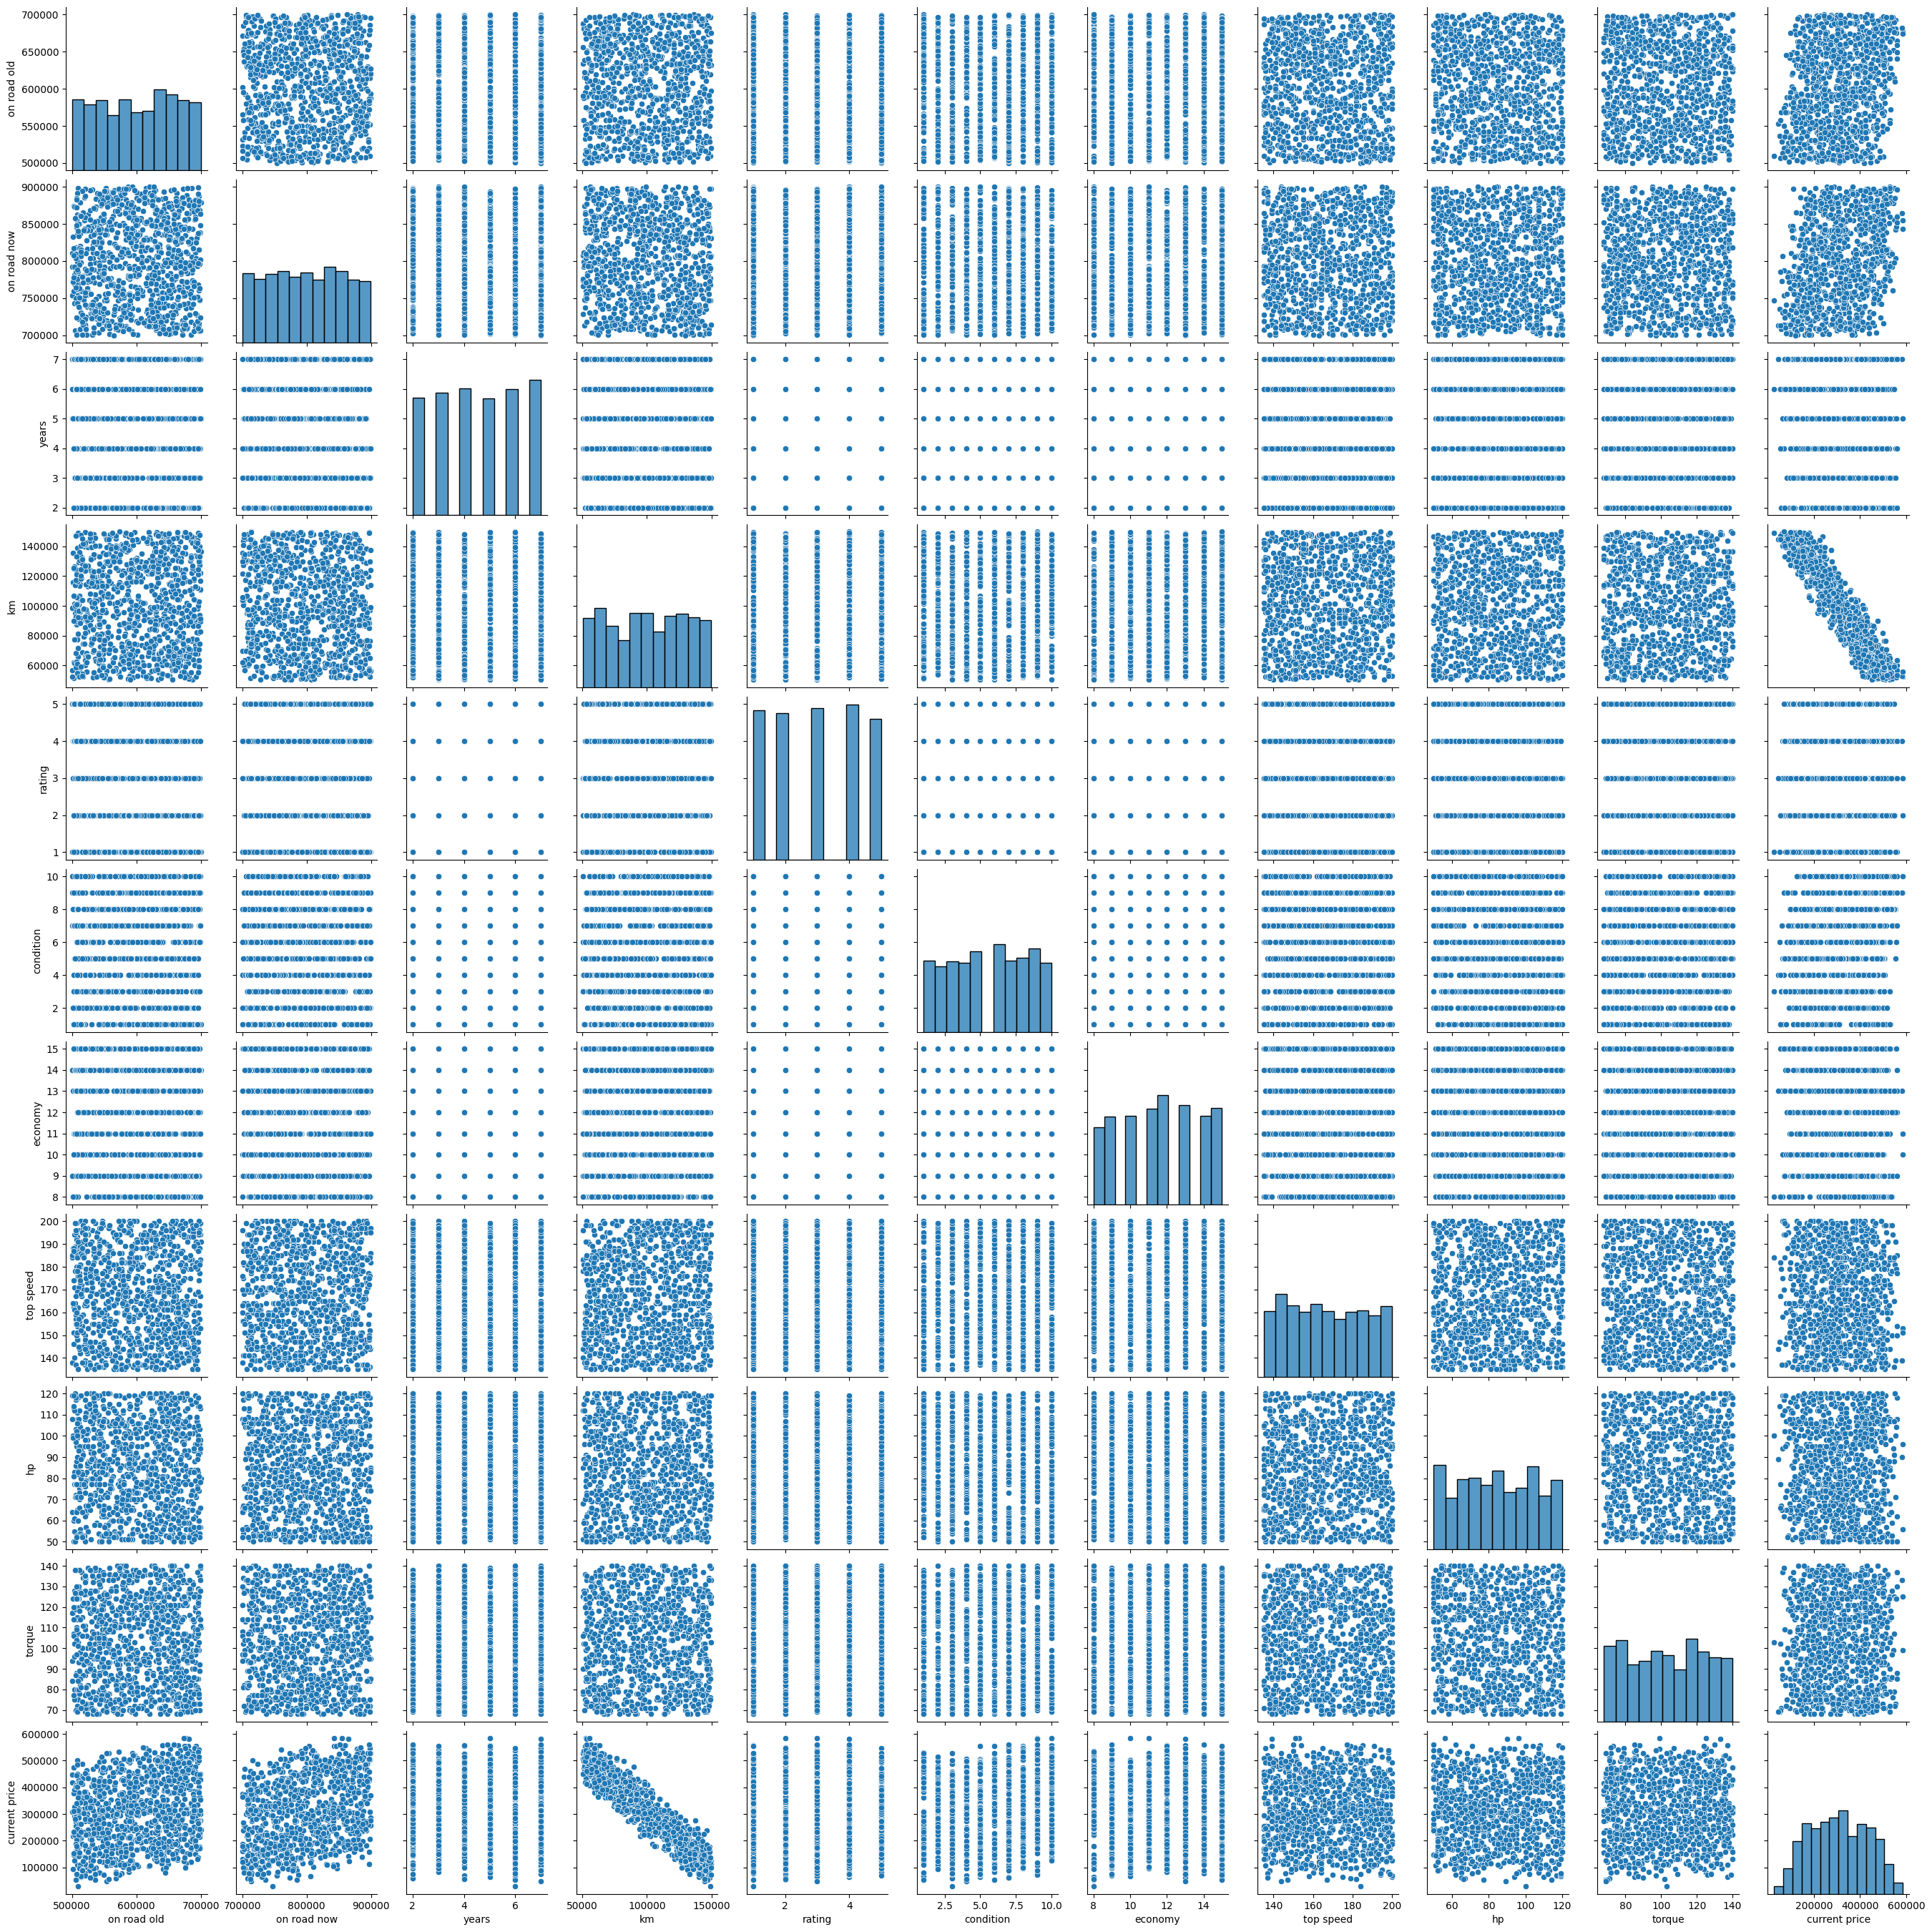

In [7]:
sns.pairplot(data[["on road old", "on road now",	"years", "km",	"rating",	"condition",	"economy",	"top speed",	"hp",	"torque",	"current price"]])

In [8]:
tensor_data = tf.constant(data)
tensor_data = tf.random.shuffle(tensor_data)
tensor_data[:10]

<tf.Tensor: shape=(10, 12), dtype=float64, numpy=
array([[3.000000e+00, 6.869900e+05, 7.707620e+05, 2.000000e+00,
        1.325380e+05, 2.000000e+00, 8.000000e+00, 1.500000e+01,
        1.810000e+02, 5.300000e+01, 9.700000e+01, 2.153860e+05],
       [8.990000e+02, 5.426510e+05, 7.226810e+05, 7.000000e+00,
        7.727000e+04, 2.000000e+00, 4.000000e+00, 1.200000e+01,
        1.450000e+02, 7.700000e+01, 1.310000e+02, 3.159590e+05],
       [4.360000e+02, 6.521750e+05, 7.568780e+05, 3.000000e+00,
        9.668600e+04, 5.000000e+00, 4.000000e+00, 1.000000e+01,
        1.900000e+02, 1.150000e+02, 1.400000e+02, 3.200080e+05],
       [3.780000e+02, 6.810980e+05, 7.917220e+05, 6.000000e+00,
        5.103200e+04, 2.000000e+00, 7.000000e+00, 8.000000e+00,
        1.500000e+02, 5.900000e+01, 1.280000e+02, 5.370140e+05],
       [8.300000e+02, 5.205010e+05, 7.407220e+05, 3.000000e+00,
        6.357100e+04, 4.000000e+00, 4.000000e+00, 1.200000e+01,
        1.970000e+02, 7.800000e+01, 1.350000e+02, 

In [9]:
X = tensor_data[ : , 1 : -1]
y = tf.expand_dims(tensor_data[ : , -1], axis = 1)
print(X.shape)
print(y.shape)

(1000, 10)
(1000, 1)


In [31]:
train_size = .8
test_size = .1
val_size = .1
data_size = len(data)

x_train = X[ : int(train_size*data_size)]
y_train = y[ : int(train_size*data_size)]

x_val = X[int(train_size*data_size) : int((train_size + val_size)*data_size)]
y_val = y[int(train_size*data_size) : int((train_size + val_size)*data_size)]

x_test = X[int((train_size + val_size)*data_size) : int((train_size + val_size + test_size)*data_size)]
y_test = y[int((train_size + val_size)*data_size) : int((train_size + val_size + test_size)*data_size)]

x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

(TensorShape([800, 10]),
 TensorShape([800, 1]),
 TensorShape([100, 10]),
 TensorShape([100, 1]),
 TensorShape([100, 10]),
 TensorShape([100, 1]))

In [32]:
#Normalization
normalizer = Normalization()
normalizer.adapt(x_train)
X = normalizer(x_train)


In [33]:
model = tf.keras.Sequential([
    normalizer,
    Dense(1),
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (800, 10)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (88.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21 (88.00 B)

In [80]:
#Another way of making the model
model_2 = tf.keras.Sequential()
model_2.add(InputLayer(input_shape =(10,)))
model_2.add(normalizer)
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(1))

model_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 10)             │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,110 (35.59 KB)

 Trainable params: 9,089 (35.50 KB)

 Non-trainable params: 21 (88.00 B)

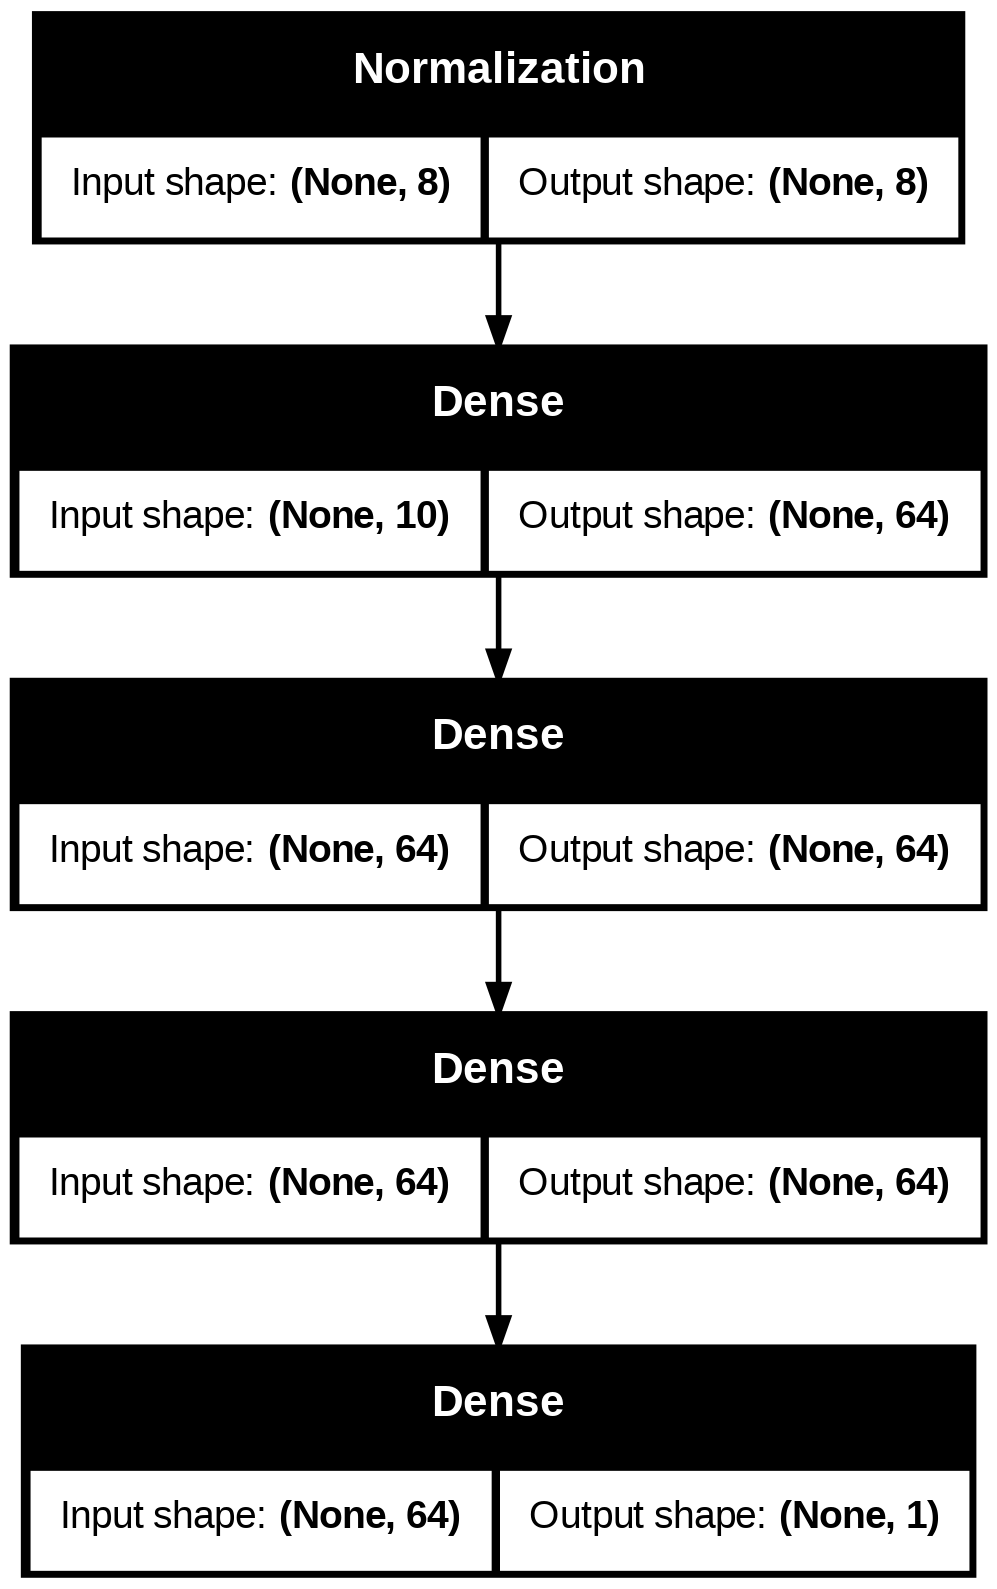

In [81]:
tf.keras.utils.plot_model(model_2, show_shapes=True)


In [82]:
error = tf.keras.losses.Huber()


In [83]:
model_2.compile(optimizer=Adam(learning_rate=0.001), loss=error, metrics=[RootMeanSquaredError()])

In [84]:
history = model_2.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), verbose=True)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 302954.4688 - root_mean_squared_error: 327004.2188 - val_loss: 305909.9688 - val_root_mean_squared_error: 329469.5625
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 308539.7188 - root_mean_squared_error: 333400.1875 - val_loss: 305891.8750 - val_root_mean_squared_error: 329452.8750
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 311346.1875 - root_mean_squared_error: 335018.0000 - val_loss: 305819.9375 - val_root_mean_squared_error: 329386.3125
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 308016.8125 - root_mean_squared_error: 331866.4688 - val_loss: 305616.1875 - val_root_mean_squared_error: 329197.5312
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 309432.7500 - root_mean_squared_error: 333829.0938 - val_loss: 305147.3750 - val_root_mean_squared_error: 328763.2812
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 315768.2188 - root_mean_squared_error: 339779.2812 - va

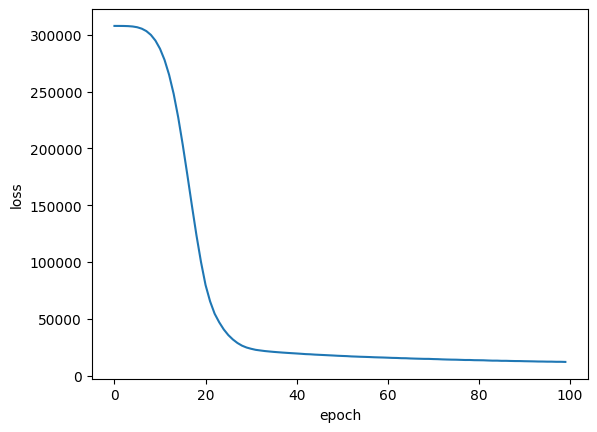

In [85]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


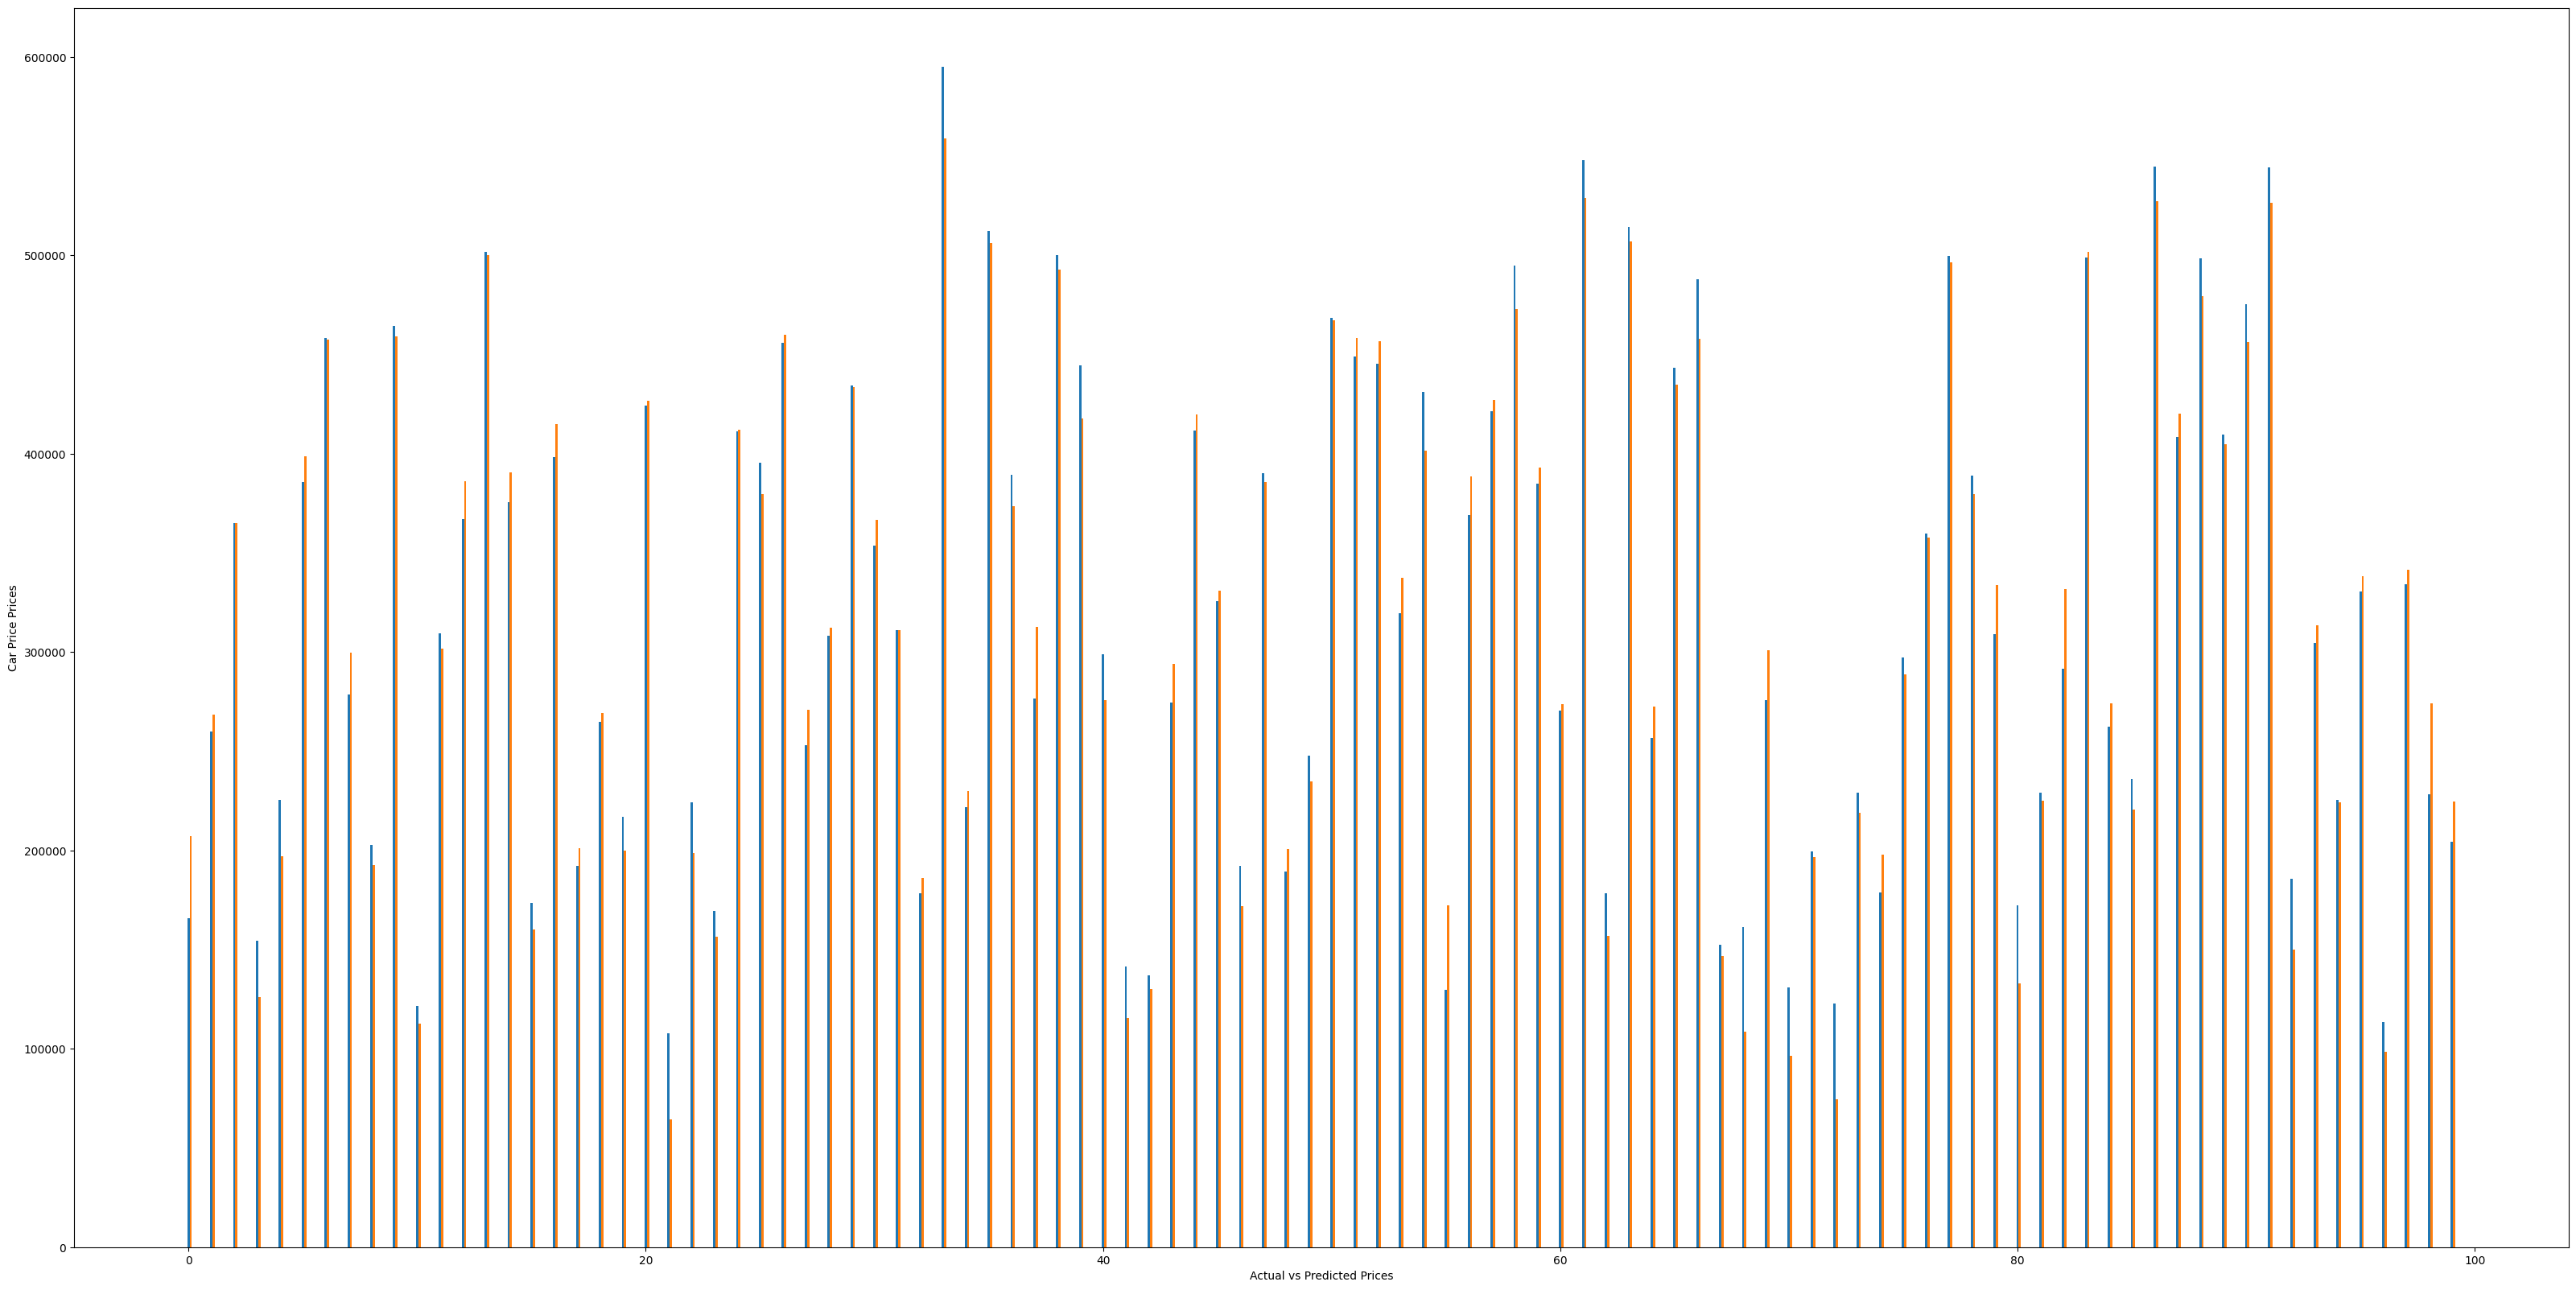

In [86]:
y_true = list(y_test[:,0].numpy())
y_pred = list(model_2.predict(x_test)[:,0])


ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()